# Visualisation et évolution du NDVI au sein du forêt de la Lama. 
Les données utilisées sont des données issues de Google Earth Engine. Ce dataset renseigne principalement sur la valeur moyenne du NDVI dans la forêt Classée de la Lama de 2000 à 2023. 

## Importation des packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Importation de la base de données

In [2]:
data = pd.read_csv(r'd:\Projet IA\Datasets\NDVI_Lama_Mensuel.csv', sep = ",")
data

,system:index,mean,month,year,.geo
0,0_0,2837.498899,2.0,2000.0,"{""type"":""Polygon"",""coordinates"":[[[2.0667,6.91..."
1,1_0,4074.755630,3.0,2000.0,"{""type"":""Polygon"",""coordinates"":[[[2.0667,6.91..."
2,2_0,4354.038645,4.0,2000.0,"{""type"":""Polygon"",""coordinates"":[[[2.0667,6.91..."
3,3_0,5867.642405,5.0,2000.0,"{""type"":""Polygon"",""coordinates"":[[[2.0667,6.91..."
4,4_0,8034.488569,6.0,2000.0,"{""type"":""Polygon"",""coordinates"":[[[2.0667,6.91..."
...,...,...,...,...,...
272,272_0,5358.829903,10.0,2022.0,"{""type"":""Polygon"",""coordinates"":[[[2.0667,6.91..."
273,273_0,8088.032059,11.0,2022.0,"{""type"":""Polygon"",""coordinates"":[[[2.0667,6.91..."
274,274_0,7073.621214,12.0,2022.0,"{""type"":""Polygon"",""coordinates"":[[[2.0667,6.91..."
275,275_0,5572.824813,1.0,2023.0,"{""type"":""Polygon"",""coordinates"":[[[2.0667,6.91..."


## Sélection des colonnes importantes (NDVI, month, year)

In [3]:
df = data[['mean', 'month', 'year']]
df.head()

,mean,month,year
0,2837.498899,2.0,2000.0
1,4074.755630,3.0,2000.0
2,4354.038645,4.0,2000.0
3,5867.642405,5.0,2000.0
4,8034.488569,6.0,2000.0


## Vraies valeurs de NDVI

In [4]:
df['NDVI'] = df['mean']/10000
df.head()

C:\Users\CAMILLE FAGBEDJI\AppData\Local\Temp\ipykernel_10752\536054323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NDVI'] = df['mean']/10000


,mean,month,year,NDVI
0,2837.498899,2.0,2000.0,0.283750
1,4074.755630,3.0,2000.0,0.407476
2,4354.038645,4.0,2000.0,0.435404
3,5867.642405,5.0,2000.0,0.586764
4,8034.488569,6.0,2000.0,0.803449


## Transformation des variables month et year en entiers

In [5]:
col = ['month', 'year']
for sc in col : 
    df[sc] = pd.to_numeric(df[sc], errors = 'coerce').astype("Int64")
df.head()

C:\Users\CAMILLE FAGBEDJI\AppData\Local\Temp\ipykernel_10752\3677102973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sc] = pd.to_numeric(df[sc], errors = 'coerce').astype("Int64")


,mean,month,year,NDVI
0,2837.498899,2,2000,0.283750
1,4074.755630,3,2000,0.407476
2,4354.038645,4,2000,0.435404
3,5867.642405,5,2000,0.586764
4,8034.488569,6,2000,0.803449


In [6]:
df['year'].describe()

count          277.0
mean     2011.126354
std         6.677503
min           2000.0
25%           2005.0
50%           2011.0
75%           2017.0
max           2023.0
Name: year, dtype: Float64

## Groupage de la moyenne annuelle et courbe d'évolution

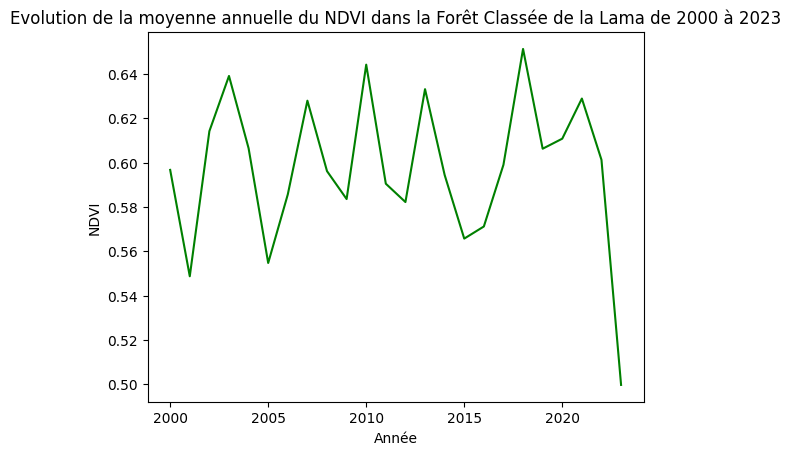

In [7]:
df.groupby('year')['NDVI'].mean().plot(kind = 'line', color = 'green')
plt.xlabel('Année')
plt.ylabel('NDVI')
plt.title("Evolution de la moyenne annuelle du NDVI dans la Forêt Classée de la Lama de 2000 à 2023")
plt.show()

## Groupage de la moyenne mensuelle et visualisation de l'évolution

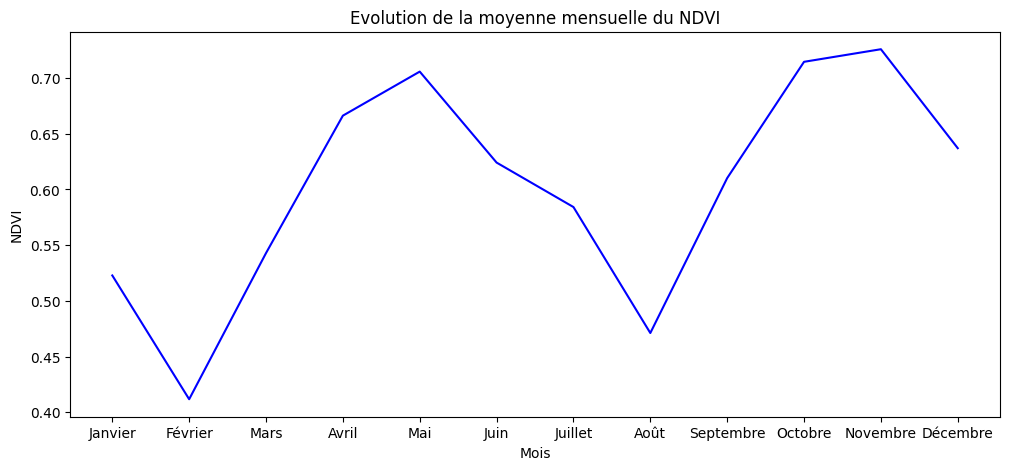

In [8]:
code_mois = [i for i in range (1, 13)]
mois_labs = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
plt.figure(figsize = (12, 5))
df.groupby('month')['NDVI'].mean().plot(kind = 'line', color = "blue")
plt.xticks(code_mois, [mois_labs[i-1] for i in code_mois])
plt.xlabel('Mois')
plt.ylabel('NDVI')
plt.title('Evolution de la moyenne mensuelle du NDVI')
plt.show()

## Boxplot pour la visualisation par mois 

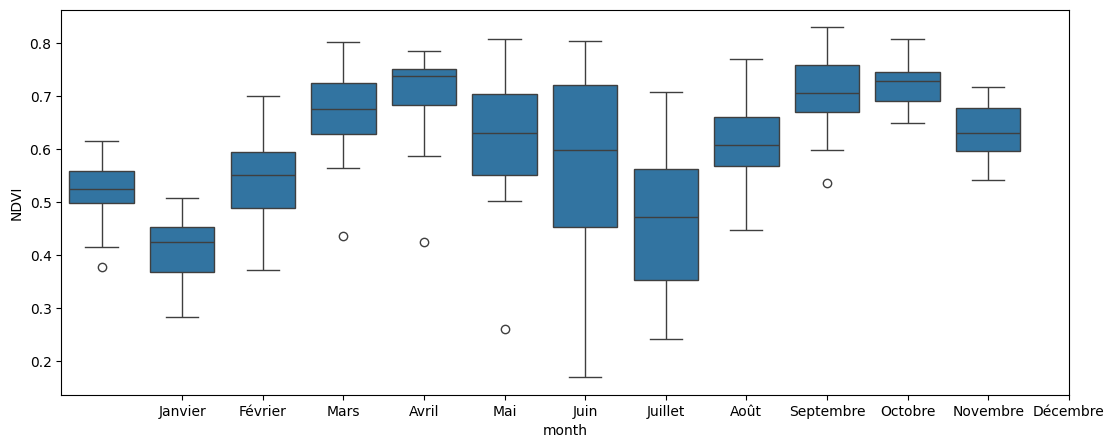

In [9]:
plt.figure(figsize=(13, 5))
sns.boxplot(data = df, x = 'month', y = 'NDVI')
plt.xticks(code_mois, [mois_labs[i-1] for i in code_mois])
plt.show()

## Boxplot pour la visualisation annuelle

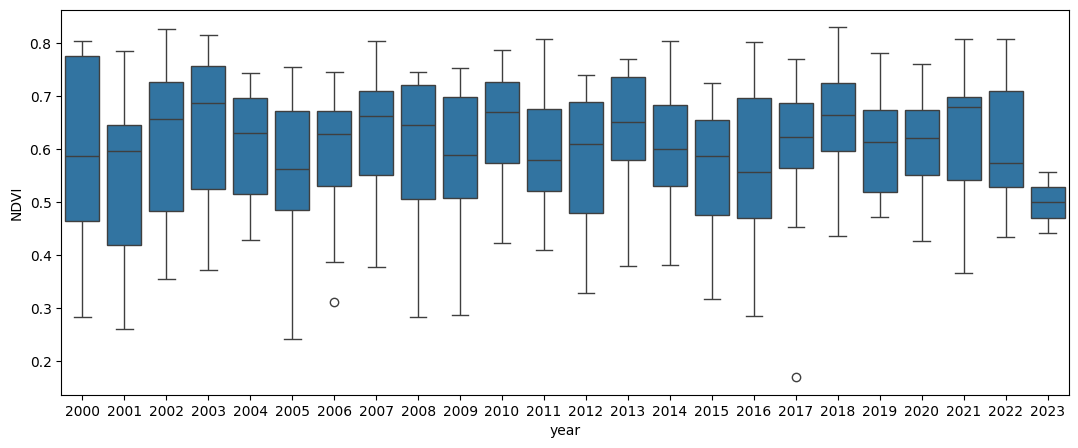

In [10]:
plt.figure(figsize=(13, 5))
sns.boxplot(data = df, x = 'year', y = 'NDVI')
plt.show()

# Prédictions avec Random Forest 

### Suppression des colonnes inutiles

In [11]:
X = df.drop(['mean'], axis = 1)

In [12]:
df.head()

,mean,month,year,NDVI
0,2837.498899,2,2000,0.283750
1,4074.755630,3,2000,0.407476
2,4354.038645,4,2000,0.435404
3,5867.642405,5,2000,0.586764
4,8034.488569,6,2000,0.803449


### Scission de la base 

In [13]:
y = X['NDVI']
X_fin = X.drop(['NDVI'], axis = 1)

## Preprocessing

In [14]:
from sklearn.model_selection import train_test_split
X_train, x_val, y_train, y_val = train_test_split(X_fin, y, test_size = 0.80, shuffle = False)

In [15]:
X_train.head()

,month,year
0,2,2000
1,3,2000
2,4,2000
3,5,2000
4,6,2000


## Entraînement du modèle 

In [16]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
#Entraînement du modèle
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

## Evaluation du modèle 

### Prédictions

In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(x_val)

### Métriques de performances (données d'entraînement)

In [18]:
mse1 = mean_squared_error(y_train, y_train_pred)
rmse1 = np.sqrt(mse1)
print(f"Mean Squared Error train: {round(mse1, 5)}")
print(f"Root Mean Squared Error train: {round(rmse1,5)}")

Mean Squared Error train: 0.00208
Root Mean Squared Error train: 0.04558


### Métriques de performances (données de validation)

In [19]:
mse2 = mean_squared_error(y_val, y_test_pred)
rmse2 = np.sqrt(mse1)
print(f"Mean Squared Error validation: {round(mse2,5)}")
print(f"Root Mean Squared Error validation: {round(rmse2,5)}")

Mean Squared Error validation: 0.01132
Root Mean Squared Error validation: 0.04558


## Comparaison

In [20]:
if rmse2 < rmse1 : 
    print("La RMSE sur les données de validation est inférieur à la RMSE sur les données d'entrainement")
else : 
    print("La RMSE sur les données de validation est supérieur à la RMSE sur les données d'entrainement")

La RMSE sur les données de validation est supérieur à la RMSE sur les données d'entrainement


### Graphique 1 (données de validation)

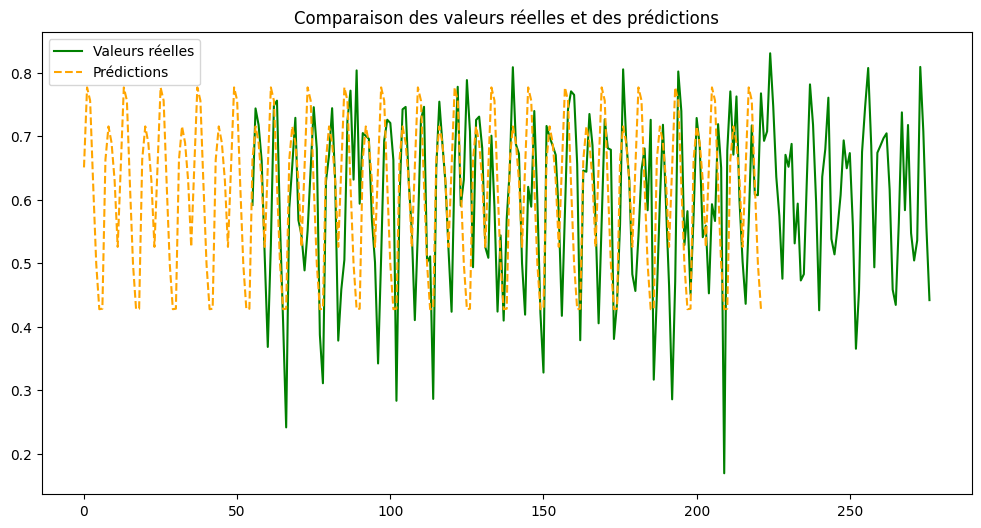

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(y_val, label='Valeurs réelles', color='green')
plt.plot(y_test_pred, label='Prédictions', color='orange', linestyle='--')
plt.title('Comparaison des valeurs réelles et des prédictions')
plt.legend()
plt.show()

### Graphique 2 (données d'entrainement)

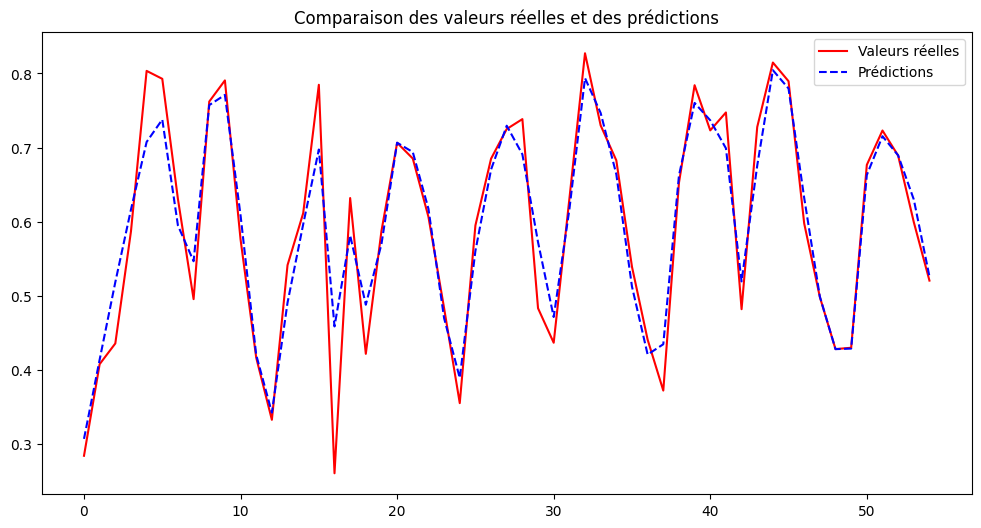

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Valeurs réelles', color='red')
plt.plot(y_train_pred, label='Prédictions', color='blue', linestyle='--')
plt.title('Comparaison des valeurs réelles et des prédictions')
plt.legend()
plt.show()

# Optimisation du modèle (Gridsearch)

### Définition des paramètres

In [23]:
param= {'n_estimators' : [100, 200, 300, 400], 
              'max_depth' : [None, 5, 10, 15], 
              'min_samples_split': [2,5,10], 
              'min_samples_leaf' : [1,5,10], 
              'max_features': ['auto', 'sqrt', 'log2']}

### Création du modèle

In [24]:
rf = RandomForestRegressor(random_state=42)

### Création de la grille 

In [25]:
grid_search = GridSearchCV(estimator = rf, param_grid= param)
## entrainement 
grid_search.fit(X_train, y_train)

d:\Documents\Code Python\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Documents\Code Python\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Documents\Code Python\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "d:\Documents\Code Python\.venv\Lib\site-packages\sklearn\base.py", line 4

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]})

### Obtention des paramètres

In [26]:
print("Meilleurs hyperparamètres :", grid_search.best_params_)  ##meilleurs paramètres 
print("Meilleur score :", grid_search.best_score_)   ## meilleur score

Meilleurs hyperparamètres : {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Meilleur score : 0.40072328030908216


### Extraction du meilleur modèle et prédiction

In [27]:
best = grid_search.best_estimator_  ##extraction du modèle 
y_opt_pred = best.predict(X_train)
y_val_pred = best.predict(x_val)

### Métriques après optimisation

In [28]:
mse_opt = mean_squared_error(y_train, y_opt_pred)
rmse_opt = np.sqrt(mse_opt)
print(f"Mean Squared Error train: {round(mse_opt,5)}")
print(f"Root Mean Squared Error train: {round(rmse_opt, 5)}")

Mean Squared Error train: 0.00721
Root Mean Squared Error train: 0.08489


## Métriques sur données de validation

In [29]:
mse_val_opt = mean_squared_error(y_val, y_val_pred)
rmse_val_opt = np.sqrt(mse_val_opt)
print(f"Mean Squared Error train: {round(mse_val_opt,5)}")
print(f"Root Mean Squared Error train: {round(rmse_val_opt, 5)}")

Mean Squared Error train: 0.01146
Root Mean Squared Error train: 0.10704


### Comparaison des modèles

In [30]:
if rmse2 < rmse_val_opt : 
    print ("Le modèle par défaut est meilleur que le modèle optimisé")
else : 
    print("Le modèle optimisé est meilleur que le modèle par défaut")

Le modèle par défaut est meilleur que le modèle optimisé
